In [35]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import pickle

In [36]:
M_sun = 1.98992e+33 # gram
UnitMass_in_g = 1.0 * M_sun       # !!!!!!!!!!!!!!!!!!!!!!!!! CHANGE !!!!!!!!!!!!!!!!!
UnitRadius_in_cm = 9.2e16  #!!!!!!!!!!!!!! CHANGE !!!!!!!!!!!!!!!!!!
UnitDensity_in_cgs = UnitMass_in_g / UnitRadius_in_cm**3

print(f'UnitDensity_in_cgs = {UnitDensity_in_cgs} g/cm^3')

G = 6.6738e-8
rgas = 9.2e16                                     # The initial radius of the cloud in cm
rho0 = 6.02e-19                                   # The initial average density
tff = np.sqrt(3*np.pi/(32*G*rho0))                # The free-fall time = 3.4e4 yr
unitTime_in_s = tff                               # Scaling time to free-fall time
unitLength_in_cm = rgas                           # Scaling distance to the initial cloud radius

unitVelocity_in_cm_per_s = unitLength_in_cm / unitTime_in_s          # The internal velocity unit
print(f'unitVelocity_in_cm_per_s = {round(unitVelocity_in_cm_per_s, 2)} cm/s')

UnitDensity_in_cgs = 2.555477932111449e-18 g/cm^3
unitVelocity_in_cm_per_s = 33979.12 cm/s


In [42]:
#NN = 7500
#j = 1444
#filz = np.sort(glob.glob('/mnt/Linux_Shared_Folder_2022/Output_21_August/*.pkl'))

#NN = 100
j = 718
filz = np.sort(glob.glob('./Outputs_10k_beta_0.01/*.pkl'))

with open(filz[j], 'rb') as f:
    data = pickle.load(f)

r = data['pos']
h = data['h']
v = data['v']
rho = data['rho']
mass = data['m']

x = r[:, 0]
y = r[:, 1]
z = r[:, 2]
t = data['current_t']
unitTime_in_kyr = data['unitTime_in_kyr']

print('rho = ', np.sort(rho)*UnitDensity_in_cgs)

## Selecting particles in a thin shell parallel to the x-y plane

# delta = 0.5

# nz = np.where((z >= -delta) & (z <= delta))[0]
# print(len(nz))

# x = x[nz]
# y = y[nz]
# z = z[nz]

# mass = mass[nz]

rho =  [3.42192488e-22 3.82431072e-22 3.86119728e-22 ... 8.48186250e-14
 9.26531456e-14 9.58501890e-14]


(-1.0, 1.0)

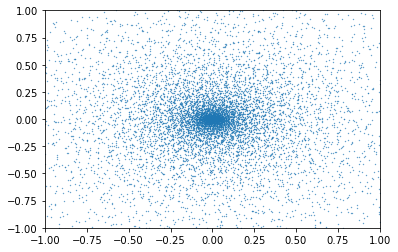

In [43]:
plt.scatter(x, z, s = 0.1)
plt.xlim(-1, 1)
plt.ylim(-1, 1)

In [44]:

d = (x*x + y*y + z*z)**0.5 * UnitRadius_in_cm

xgrid = np.linspace(14.2, 16.5, 20)

res = []

for i in range(1, len(xgrid)-1):
    
    nt = np.where((np.log10(d)>=xgrid[0]) & (np.log10(d)<xgrid[i+1]))[0]
    
    m = np.sum(mass[nt])
    
    res.append([xgrid[i], m])

res = np.array(res)

d = res[:, 0]
m = res[:, 1]
    

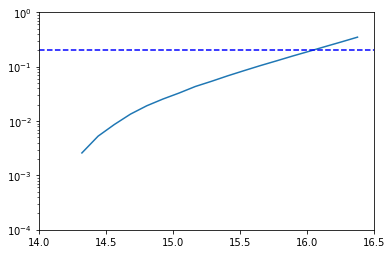

In [45]:
plt.plot(d, m)
plt.yscale('log')
plt.xlim(14, 16.5)
plt.ylim(0.0001, 1)

plt.axhline(y = 0.2, linestyle = '--', color = 'blue');

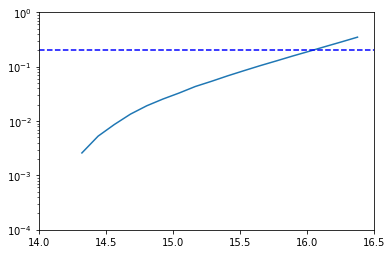

In [46]:
plt.plot(d, m)
plt.yscale('log')
plt.xlim(14, 16.5)
plt.ylim(0.0001, 1)

plt.axhline(y = 0.2, linestyle = '--', color = 'blue');